# Creating Twitter Networks



In [1]:
#!conda install tweepy -y

In [72]:
# General:
import pandas as pd     # To handle data
import numpy as np      # For number computing

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import networkx as nx
import os
from IPython.display import Image
from itertools import product
import time
import pickle
import gzip
import nxdrawing as nxd

## Load our data from the pickle file

* `followers` are the followers of our original list of tweeters
* `followers2` are the followers of our followers

In [3]:
with gzip.open("twitter.pickle.gz", "rb") as f0:
    followers, followers2 = pickle.load(f0)

## Clean up date and merge dictionaries

Our data is kind of a mess. I used two different methods to collect followers from Twitter. So I'm going to convert all the followers data into a single dictionary keyed on the tweeter and values a set of all the followers screen names for that tweeter.

I use dictionary unpacking to merge the two dictionaries

In [38]:
def get_followers_screen_names(followers):
    return set([f.screen_name for f in followers])

In [50]:
tweet_data = {**{t:set(f) for t,f in followers.items()}, **{f:get_followers_screen_names(ff) for f, ff in followers2.items()}}

In [51]:
tweet_data

{'AaronSecrestMD': {'AlexNavarini',
  'EmilyMud',
  'FauxyMyLauxy',
  'JDDOnline',
  'NotURConscience',
  'PITLaw',
  'Raynard_W',
  'SGHealthEd',
  'SuzanneOlbricht',
  'TravisBiggsTX',
  'TroyStevens101',
  'biggslawfirm',
  'calecimpro',
  'dermnetnz',
  'dominik_ose',
  'gooserrrrr',
  'graciebrummer',
  'jbw5295',
  'surgery_medecin',
  'vistaspinecare'},
 'AzizBoxwala': {'ChaseGilliam',
  'JGCedarBridge',
  'JoannaSapida',
  'OoOJahhaaf',
  'SpeakoutonFGM',
  'SusanCHull',
  'anitasamarth',
  'arihantpatawari',
  'bblaufeux',
  'chapmanbe',
  'dianejcarter',
  'gigapharmd',
  'ikehbana',
  'kimbrid23',
  'lbkgorr',
  'meliorix',
  'mworkshealth',
  'sbequity',
  't3chn0sys',
  'y_patni'},
 'CTrappe': {'4cornershike',
  'BasketcaseT4',
  'CFEMediaTech',
  'ElmanMinerva',
  'Engrave_Awards',
  'EpiphanVideo',
  'Ilgiovanipierro',
  'KevinLeeSwaim',
  'PinterestVABiz',
  'RealSenpaiBot',
  'RichmanND',
  'SilverFlynn_',
  'SilverStarr_',
  'TheEarlOfMinto',
  'amitraj_1',
  'brandta

## Create a *Directional* Graph

The graph is directional because following is a one-way relationship: just because you are following me, doesn't mean I'm following you.

In [52]:
bmi_twitter = nx.DiGraph()

## How big is our graph?

In [53]:
for t in tweet_data:
    bmi_twitter.add_node(t)


In [54]:
print(bmi_twitter.number_of_nodes())
print(bmi_twitter.number_of_edges())

57
0


### adding edges between `tweeters` and `followers`

I use the `itertools.product` to create the Cartesian product of all our nodes (remember from our Set Theory module) and then add an edge if their is an appropriate follower relationship

#### Note

When creating directional edges, the first argument is the **from** node and the second argument is the **to** node.

In [56]:
pairs = product(bmi_twitter.nodes(), bmi_twitter.nodes())
for p in pairs:
    if p[0] in tweet_data[p[1]]:
        bmi_twitter.add_edge(p[0], p[1], type="follower")

In [57]:
bmi_twitter.number_of_edges()

89

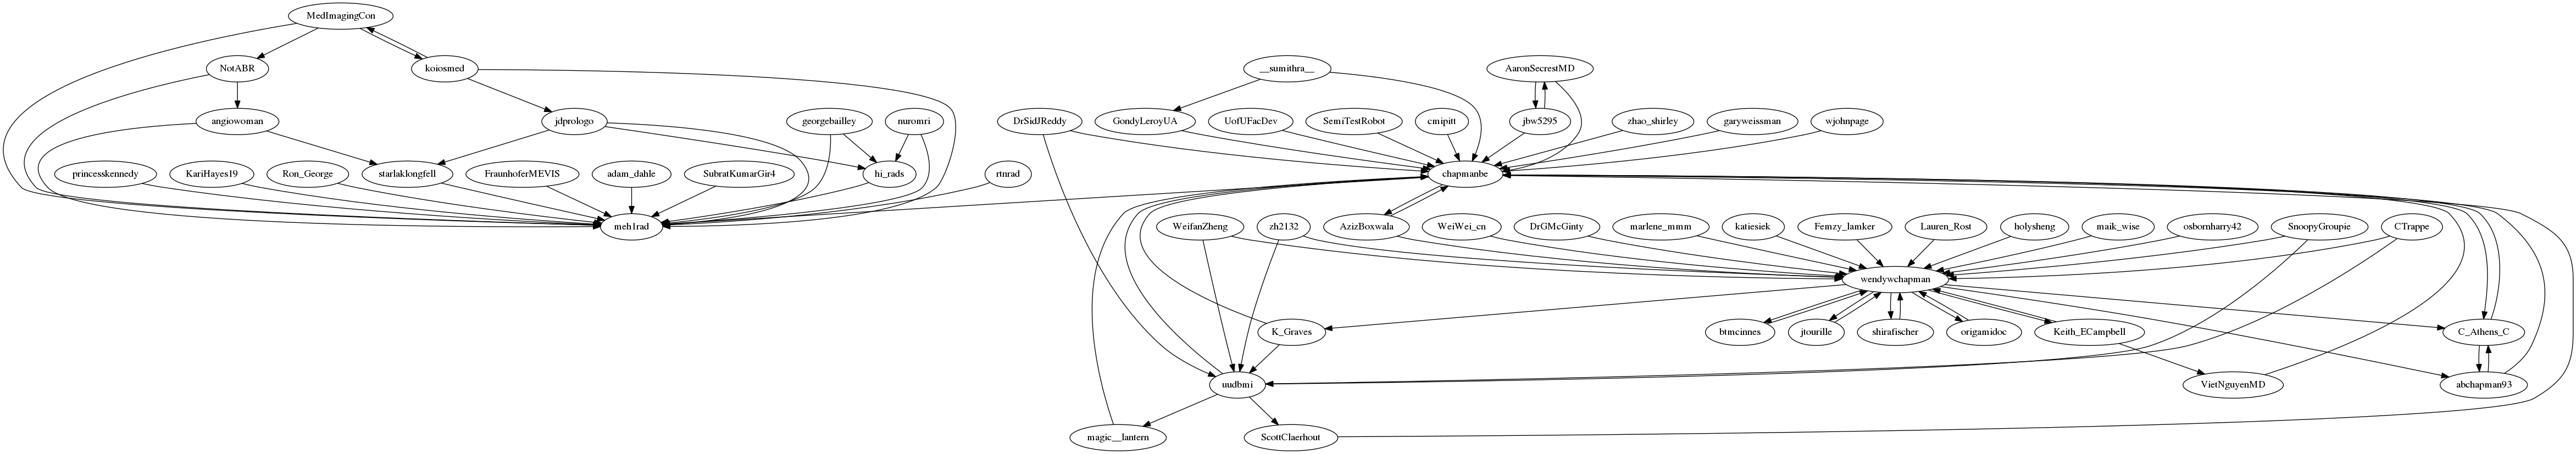

In [73]:

display(nxd.draw_dot(bmi_twitter, file="twitter2.png"))


## Challenge:  Who in your network is following the most people in the network?

#### Hint: `neighbors` or ``successors``

[]

## Challenge: Who in your network is followed by the most people in the network?

#### Hint: `predecessors`

5

## Challenge: If you convert to an undirected graph and drop any isolated nodes, what is the diameter of the graph?

## What is the longest shortest path in your network?